<a href="https://colab.research.google.com/github/kiet1043/AI-homeworks/blob/main/BT_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Medical Diagnosis System Using Fuzzy Logic

0.1999999999999999


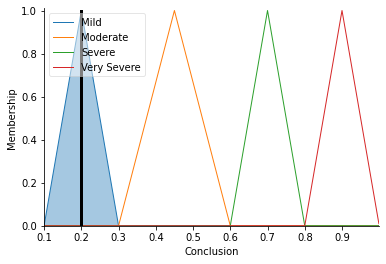

In [8]:
from skfuzzy import membership
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fuzzyValues = np.arange(0.1, 1.0, 0.001)

# Inputs
fever          = ctrl.Antecedent(fuzzyValues, 'Fever')
headache       = ctrl.Antecedent(fuzzyValues, 'Headache')
nausea         = ctrl.Antecedent(fuzzyValues, 'Nausea')
vomiting       = ctrl.Antecedent(fuzzyValues, 'Vomiting')
jaundice       = ctrl.Antecedent(fuzzyValues, 'Jaundice')
enlargeLiver   = ctrl.Antecedent(fuzzyValues, 'Enlarge Liver')
jointPain      = ctrl.Antecedent(fuzzyValues, 'Joint Pain')
bodyWeakness   = ctrl.Antecedent(fuzzyValues, 'Body Weakness')
dizziness      = ctrl.Antecedent(fuzzyValues, 'Dizziness')
lossOfAppetite = ctrl.Antecedent(fuzzyValues, 'Loss Of Appetite')
MP             = ctrl.Antecedent(fuzzyValues, 'MP')

# Output
conclusion = ctrl.Consequent(fuzzyValues, 'Conclusion')

# Membership
def MembershipFunction(field):
    field['Mild']        = fuzz.trimf(fuzzyValues, [0.1, 0.2, 0.3])
    field['Moderate']    = fuzz.trimf(fuzzyValues, [0.3, 0.45, 0.6])
    field['Severe']      = fuzz.trimf(fuzzyValues, [0.6, 0.7, 0.8])
    field['Very Severe'] = fuzz.trimf(fuzzyValues, [0.8, 0.9, 1.0])
    
  
MembershipFunction(fever)
MembershipFunction(headache)
MembershipFunction(nausea)
MembershipFunction(vomiting)
MembershipFunction(jaundice)
MembershipFunction(enlargeLiver)
MembershipFunction(jointPain)
MembershipFunction(bodyWeakness)
MembershipFunction(dizziness)
MembershipFunction(lossOfAppetite)
MembershipFunction(MP)
MembershipFunction(conclusion)


dict_value = {1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Very Severe'}
rule = []

def MakeRule(i):
    f1  = dict_value[val_fever[i]]
    f2  = dict_value[val_headache[i]]
    f3  = dict_value[val_nausea[i]]
    f4  = dict_value[val_vomiting[i]]
    f5  = dict_value[val_jaundice[i]]
    f6  = dict_value[val_enlargeLiver[i]]
    f7  = dict_value[val_jointPain[i]]
    f8  = dict_value[val_bodyWeakness[i]]
    f9  = dict_value[val_dizziness[i]]
    f10 = dict_value[val_lossOfAppetite[i]]
    f11 = dict_value[val_MP[i]]
    c   = dict_value[con[i]]

    rule.append(ctrl.Rule(fever[f1] & headache[f2] & nausea[f3] &
        vomiting[f4] & jaundice[f5] & enlargeLiver[f6] & jointPain[f7] &
        bodyWeakness[f8] & dizziness[f9] & lossOfAppetite[f10] & MP[f11], conclusion[c] ))
    
val_fever          = [1,2,3,4,2,1,1,2,2,1,3,2,1,3,1,4,1,2,2,4]
val_headache       = [1,1,2,1,1,2,1,2,1,1,3,3,2,3,1,2,4,4,2,3]
val_nausea         = [1,1,1,1,1,2,2,2,2,2,3,2,2,2,1,1,2,4,2,3]
val_vomiting       = [1,1,1,1,2,1,2,2,2,2,3,3,2,3,2,2,2,1,2,3]
val_jaundice       = [1,1,1,1,1,1,1,2,1,1,3,2,1,3,1,3,1,3,1,3]
val_enlargeLiver   = [1,1,1,1,1,1,1,2,3,2,3,3,1,3,1,2,2,3,1,3]
val_jointPain      = [1,2,1,3,2,1,3,2,2,1,3,2,1,3,1,1,1,2,2,3]
val_bodyWeakness   = [1,2,3,3,2,1,3,2,2,1,4,3,2,3,3,4,2,3,2,3]
val_dizziness      = [3,3,3,1,2,2,2,2,3,1,3,2,1,2,1,3,4,4,2,3]
val_lossOfAppetite = [1,3,3,1,3,1,2,2,2,1,3,1,2,2,3,1,1,4,2,3]
val_MP             = [1,2,2,3,2,1,2,2,2,1,2,2,2,3,2,2,2,3,2,2]
con                = [1,2,3,4,2,1,3,2,2,1,4,3,2,3,3,4,4,4,2,4]

for i in range(20):
    MakeRule(i)
#Control system
conclusion_control = ctrl.ControlSystem(rule)
conclusion_simulation = ctrl.ControlSystemSimulation(conclusion_control)

#fever.view()
#headache.view()
#nausea.view()
#vomiting.view()
#jaundice.view()
#enlargeLiver.view()
#jointPain.view()
#bodyWeakness.view()
#dizziness.view()
#lossOfAppetite.view()
#MP.view()
#conclusion.view()

# Compute
conclusion_simulation.inputs({'Fever': 0.2, 'Headache': 0.2, 'Nausea': 0.2, 
                               'Vomiting': 0.2, 'Jaundice': 0.2,'Enlarge Liver': 0.2,
                               'Joint Pain': 0.2, 'Body Weakness': 0.2, 'Dizziness': 0.7, 'Loss Of Appetite': 0.2, 'MP': 0.2})
conclusion_simulation.compute()
print(conclusion_simulation.output['Conclusion'])
conclusion.view(sim = conclusion_simulation)